In [18]:
import os
import datetime
import regex as re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go

plt.style.use('fivethirtyeight')
#%matplotlib inline

In [ ]:
from nltk.corpus import stopwords

In [2]:
ira_tweets = pd.read_csv('../data/ira_tweets_csv_hashed.csv')

/Users/gcdunn/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
ira_tweets.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,877919995476496385,249064136b1c5cb00a705316ab73dd9b53785748ab757f...,249064136b1c5cb00a705316ab73dd9b53785748ab757f...,249064136b1c5cb00a705316ab73dd9b53785748ab757f...,"Москва, Россия",Я примерный семьянин!,NaN,132,120,2013-12-07,...,absent,absent,0.0,0.0,0.0,0.0,[],[http://ru-open.livejournal.com/374284.html],[2572896396],NaN
1,492388766930444288,0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...,0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...,0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...,Россия,Телефонист .Изучение истории Игра в любитель...,NaN,74,8,2014-03-15,...,absent,absent,0.0,0.0,0.0,0.0,NaN,[http://pyypilg33.livejournal.com/11069.html],NaN,NaN
2,719455077589721089,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,Рязань,волны так и плещут фиолетовой волной,NaN,165,454,2014-04-29,...,absent,absent,0.0,0.0,0.0,0.0,[],[https://www.youtube.com/watch?v=9GvpImWxTJc],[40807205],NaN
3,536179342423105537,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,Рязань,волны так и плещут фиолетовой волной,NaN,165,454,2014-04-29,...,absent,absent,0.0,0.0,0.0,0.0,[STOPNazi],NaN,NaN,NaN
4,841410788409630720,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,NaN,Отвечаю на любой #ВопросПрезиденту,http://t.co/3CVqbMQFbf,4430,4413,2012-02-25,...,absent,absent,0.0,0.0,3.0,4.0,[],[https://goo.gl/fBp94X],NaN,NaN


In [4]:
ira_tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

In [5]:
ira_tweets.account_language.value_counts()

en       4606393
ru       3953675
de        102657
zh-cn      29413
id         22966
en-gb      21494
es         13979
it         13105
ar          3452
fr          1409
uk            90
Name: account_language, dtype: int64

In [29]:
eng_tweets = ira_tweets[ira_tweets.account_language == 'en']

In [30]:
eng_tweets.account_language.value_counts()

en    4606393
Name: account_language, dtype: int64

In [31]:
eng_tweets.tweet_text.head()

1         Серебром отколоколило http://t.co/Jaa4v4IFpM
2          @kpru С-300 в Иране https://t.co/elnu3qLUW7
3    Предлагаю судить их за поддержку нацизма, т.к....
8    As sun and cloud give way to moon and shadow, ...
9    RT @vesti_news: Шойгу: необходимо скоординиров...
Name: tweet_text, dtype: object

Some of the tweets reported as English language text clearly are not.  We need a better way to sort out tweets in English.  Tweets written in English likely will not contain Cyrillic letters.

In [32]:
def has_cyrillic(text):
    return bool(re.search('[\u0400-\u04FF]', text))

In [33]:
egn_tweets = eng_tweets[eng_tweets.tweet_text.astype(str).apply(has_cyrillic) == 0]

In [34]:
eng_tweets.tweet_text.head()

1         Серебром отколоколило http://t.co/Jaa4v4IFpM
2          @kpru С-300 в Иране https://t.co/elnu3qLUW7
3    Предлагаю судить их за поддержку нацизма, т.к....
8    As sun and cloud give way to moon and shadow, ...
9    RT @vesti_news: Шойгу: необходимо скоординиров...
Name: tweet_text, dtype: object

In [35]:
eng_tweets.shape

(4606393, 31)

In [36]:
eng_tweets['tweet_time'] = pd.to_datetime(eng_tweets['tweet_time'])

/Users/gcdunn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [38]:
time_series = eng_tweets.groupby(eng_tweets.tweet_time.dt.date)['tweetid'].agg('count')

(735324.0, 736785.0)

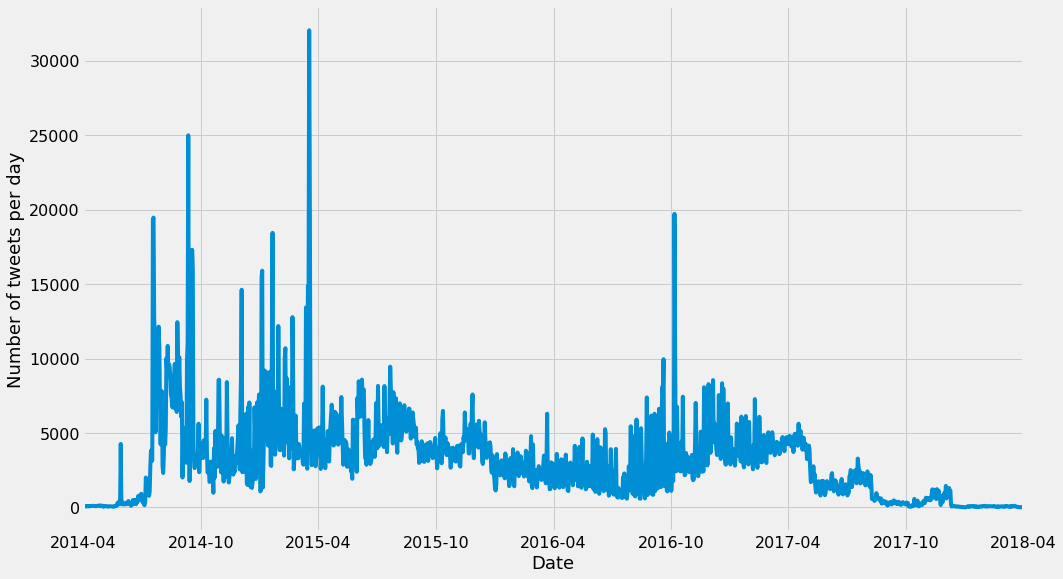

In [42]:
fig, ax = plt.subplots(figsize=(15,9))
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.plot(time_series.index, time_series.values)

ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Number of tweets per day', fontsize=18)
ax.set_xlim(datetime.date(2014, 4, 1), datetime.date(2018, 4, 1))